In [1]:
import warnings
warnings.simplefilter('ignore')

# 다차 Moving Average (MA) 모형

## 2차 MA 모형. MA(2)

2차 MA 모형 다른 표기법으로 MA(2) 모형은 다음과 같이 백색 잡음의 현재 값, 1스텝 지연된 과거 값, 그리고 2스텝 지연된 과거 값의 선형 가중합으로 나타난다.

$$ Y_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} $$

MA(2) 모형의 기댓값과 분산은 다음 성질을 만족한다.

$$ \mu = \text{E}[Y_t] = 0 $$

$$ \gamma_0 = \text{Var}[Y_t] = \sigma_e^2 (1 + \theta_1^2 + \theta_2^2) $$

이 식에서 $\sigma_e^2$는 백색 잡음의 분산이다.

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} \right] \\
&=& \text{E} [ e_t ] + \theta_1 \text{E} [ e_{t-1} + \theta_2 \text{E} [ e_{t-2} ] \\
&=& 0 + \theta_1 \cdot 0 + \theta_2 \cdot 0 \\
&=& 0\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ ( e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2})^2 \right] \\
&=& \text{E} [ e_t^2 ] + \theta_1^2 \text{E} [ e_{t-1}^2 ] + \theta_2^2 \text{E} [ e_{t-2}^2 ] + 2 \theta_1 \text{E} [ e_t e_{t-1} ] + 2 \theta_2 \text{E} [ e_t e_{t-2} ] + 2 \theta_1 \theta_2 \text{E} [ e_{t-1} e_{t-2} ] \\
&=& \sigma_e^2 + \theta_1^2 \sigma_e^2 + \theta_2^2 \sigma_e^2 + 2 \theta_1 \cdot 0 + 2 \theta_2 \cdot 0 + 2 \theta_1 \theta_2\cdot 0 \\
&=& \sigma_e^2 (1 + \theta_1^2 + \theta_2^2)  \\
\end{eqnarray}
$$

MA(2) 모형의 자기공분산은 다음과 같은 성질을 만족한다.

$$ \gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = (\theta_1 + \theta_1\theta_2) \sigma_e^2 $$

$$ \gamma_2 = \text{Cov}[Y_t, Y_{t-2}] = \theta_2 \sigma_e^2 $$

$$ \gamma_k = 0 \; \text{ for } k > 2 $$

위 성질에서 MA(2) 모형의 자기상관계수는 다음 성질을 만족한다.

$$ \rho_1 = \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} $$

$$ \rho_2 = \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} $$

$$ \rho_k = 0 \; \text{ for } k > 2 $$

## MA(2) 모형의 시뮬레이션

다음과 같은 MA(2) 모형의 예를 살펴보자

$$ Y_t = e_t - e_{t-1} + 0.6 e_{t-2} $$

앞의 성질을 이용하면 이 모형에서 생성된 시계열의 이론적인 자기상관계수는 다음과 같다.


$$ \rho_1 = -0.678$$

$$ \rho_2 = 0.254 $$

$$ \rho_k = 0 \; \text{ for } k > 2 $$

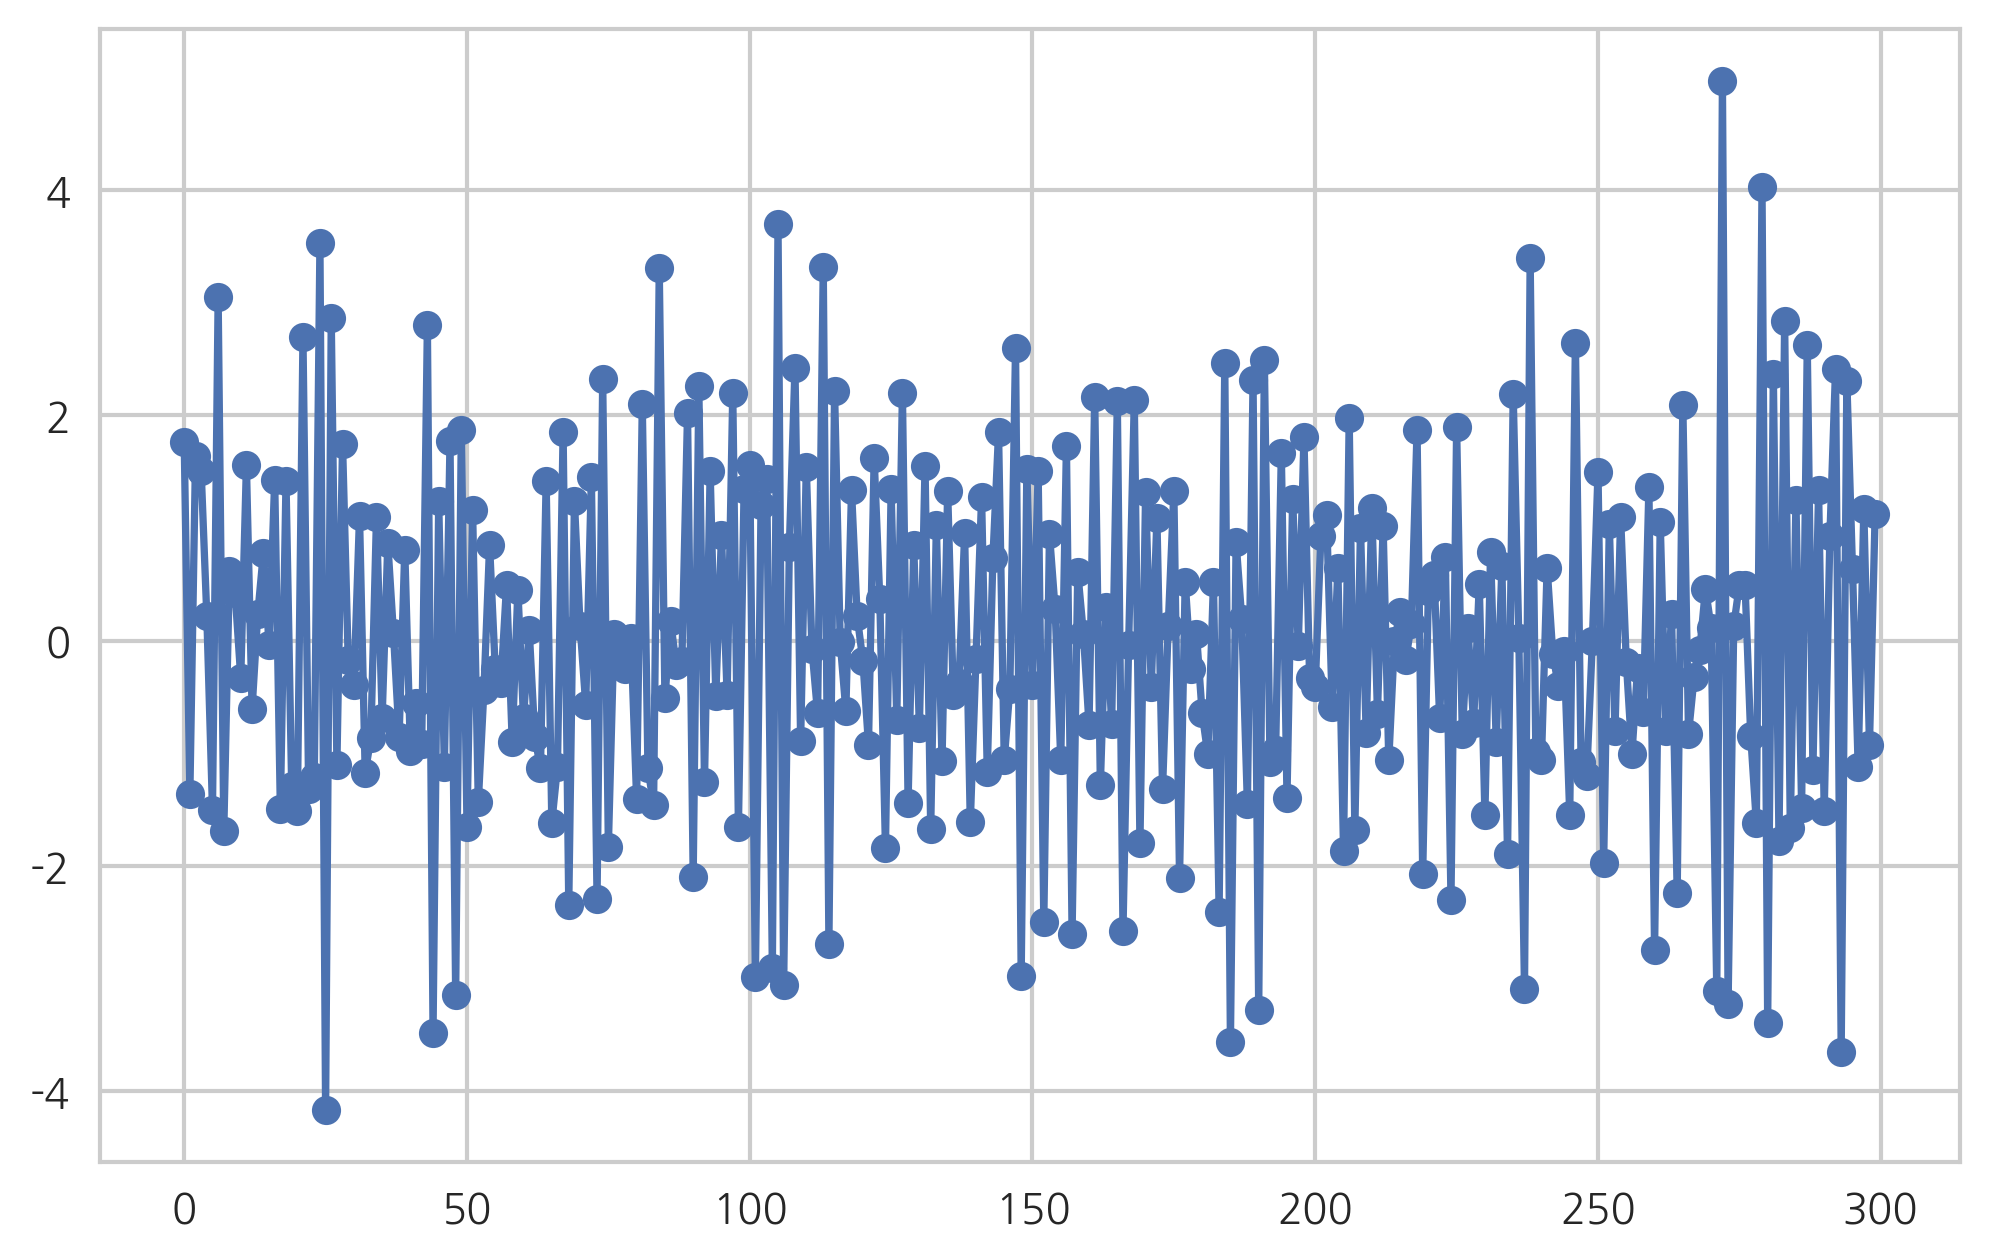

In [2]:
import statsmodels.api as sm
np.random.seed(0)
p1 = sm.tsa.ArmaProcess([1], [1, -1, 0.6])
y1 = p1.generate_sample(300)
plt.plot(y1, 'o-')

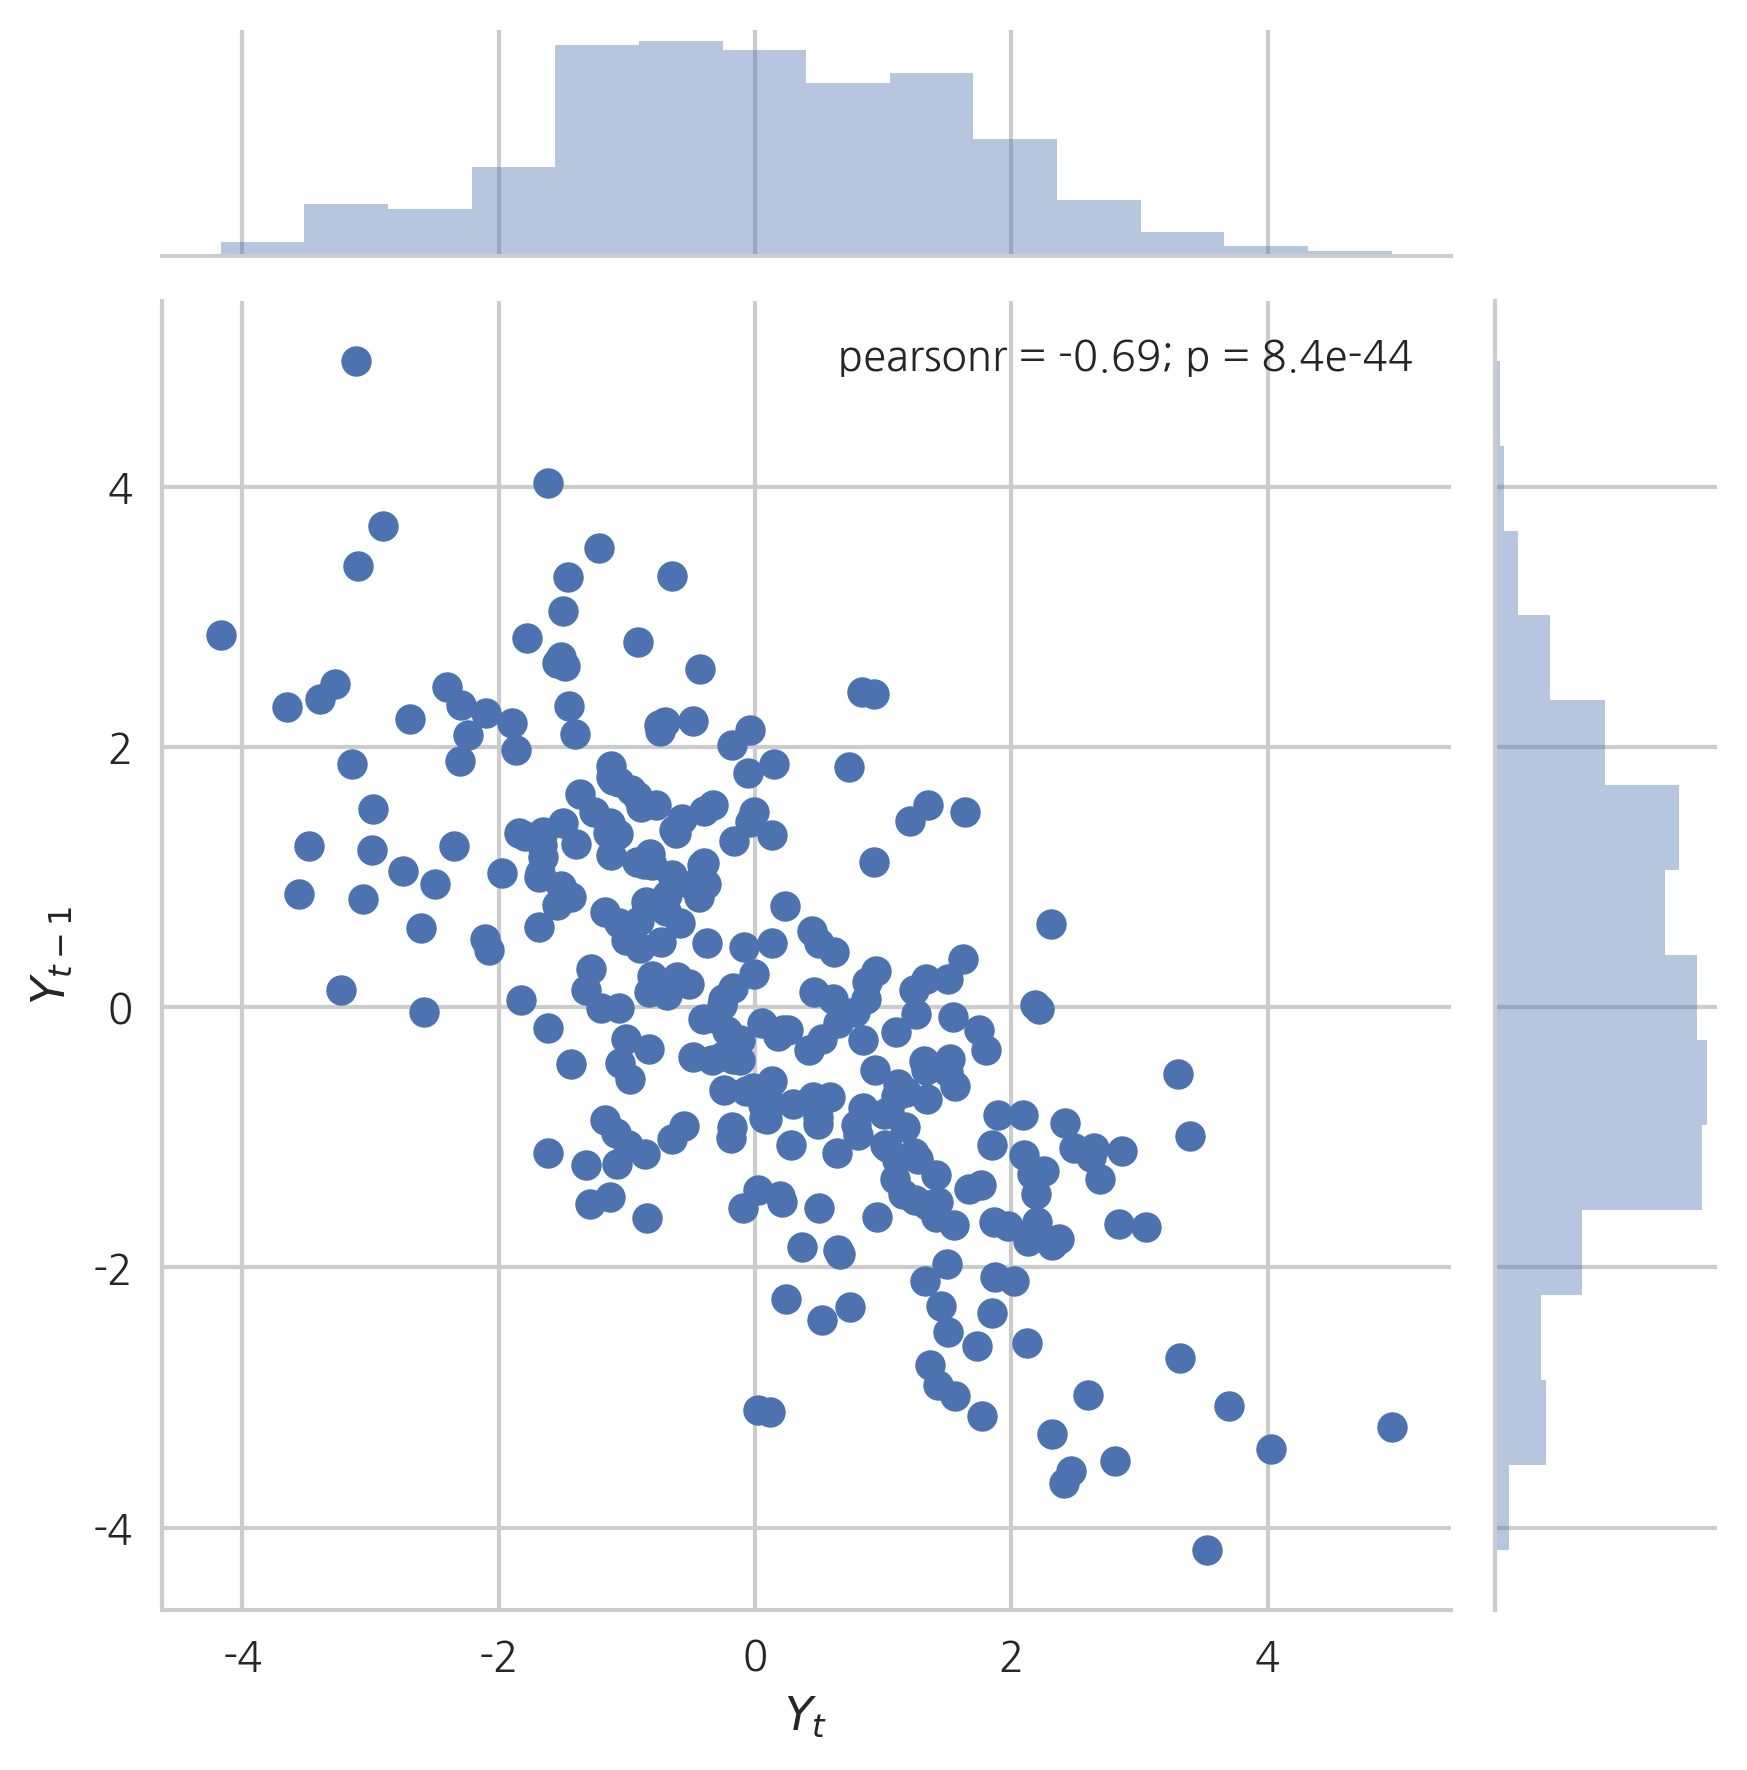

In [3]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

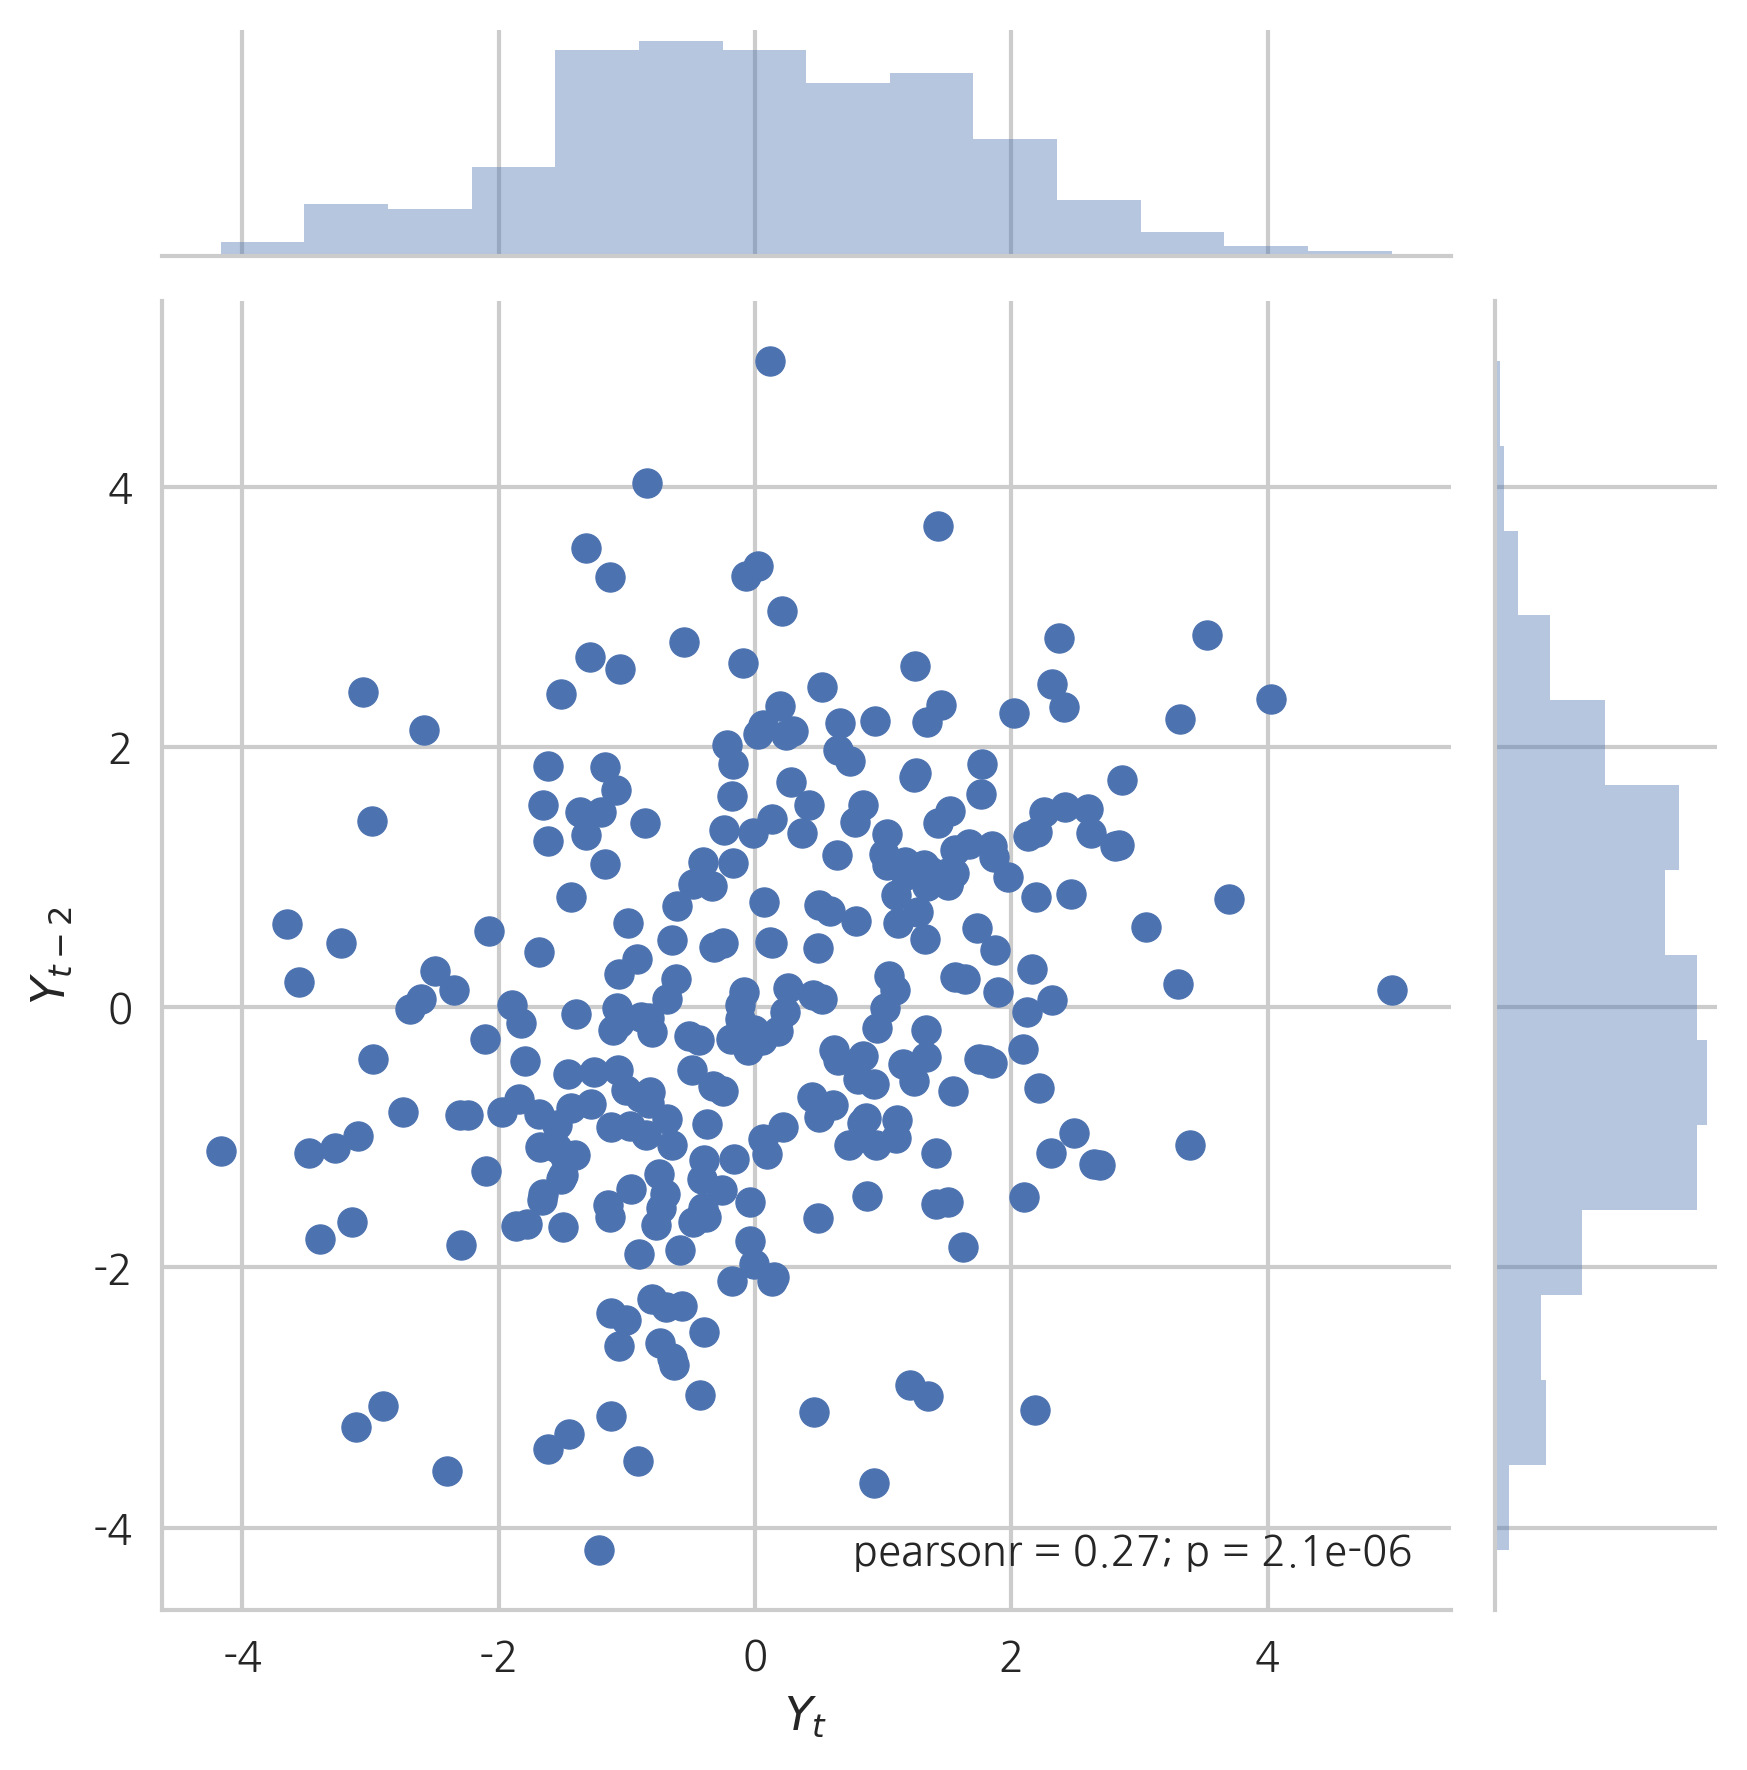

In [4]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()
plt.show()

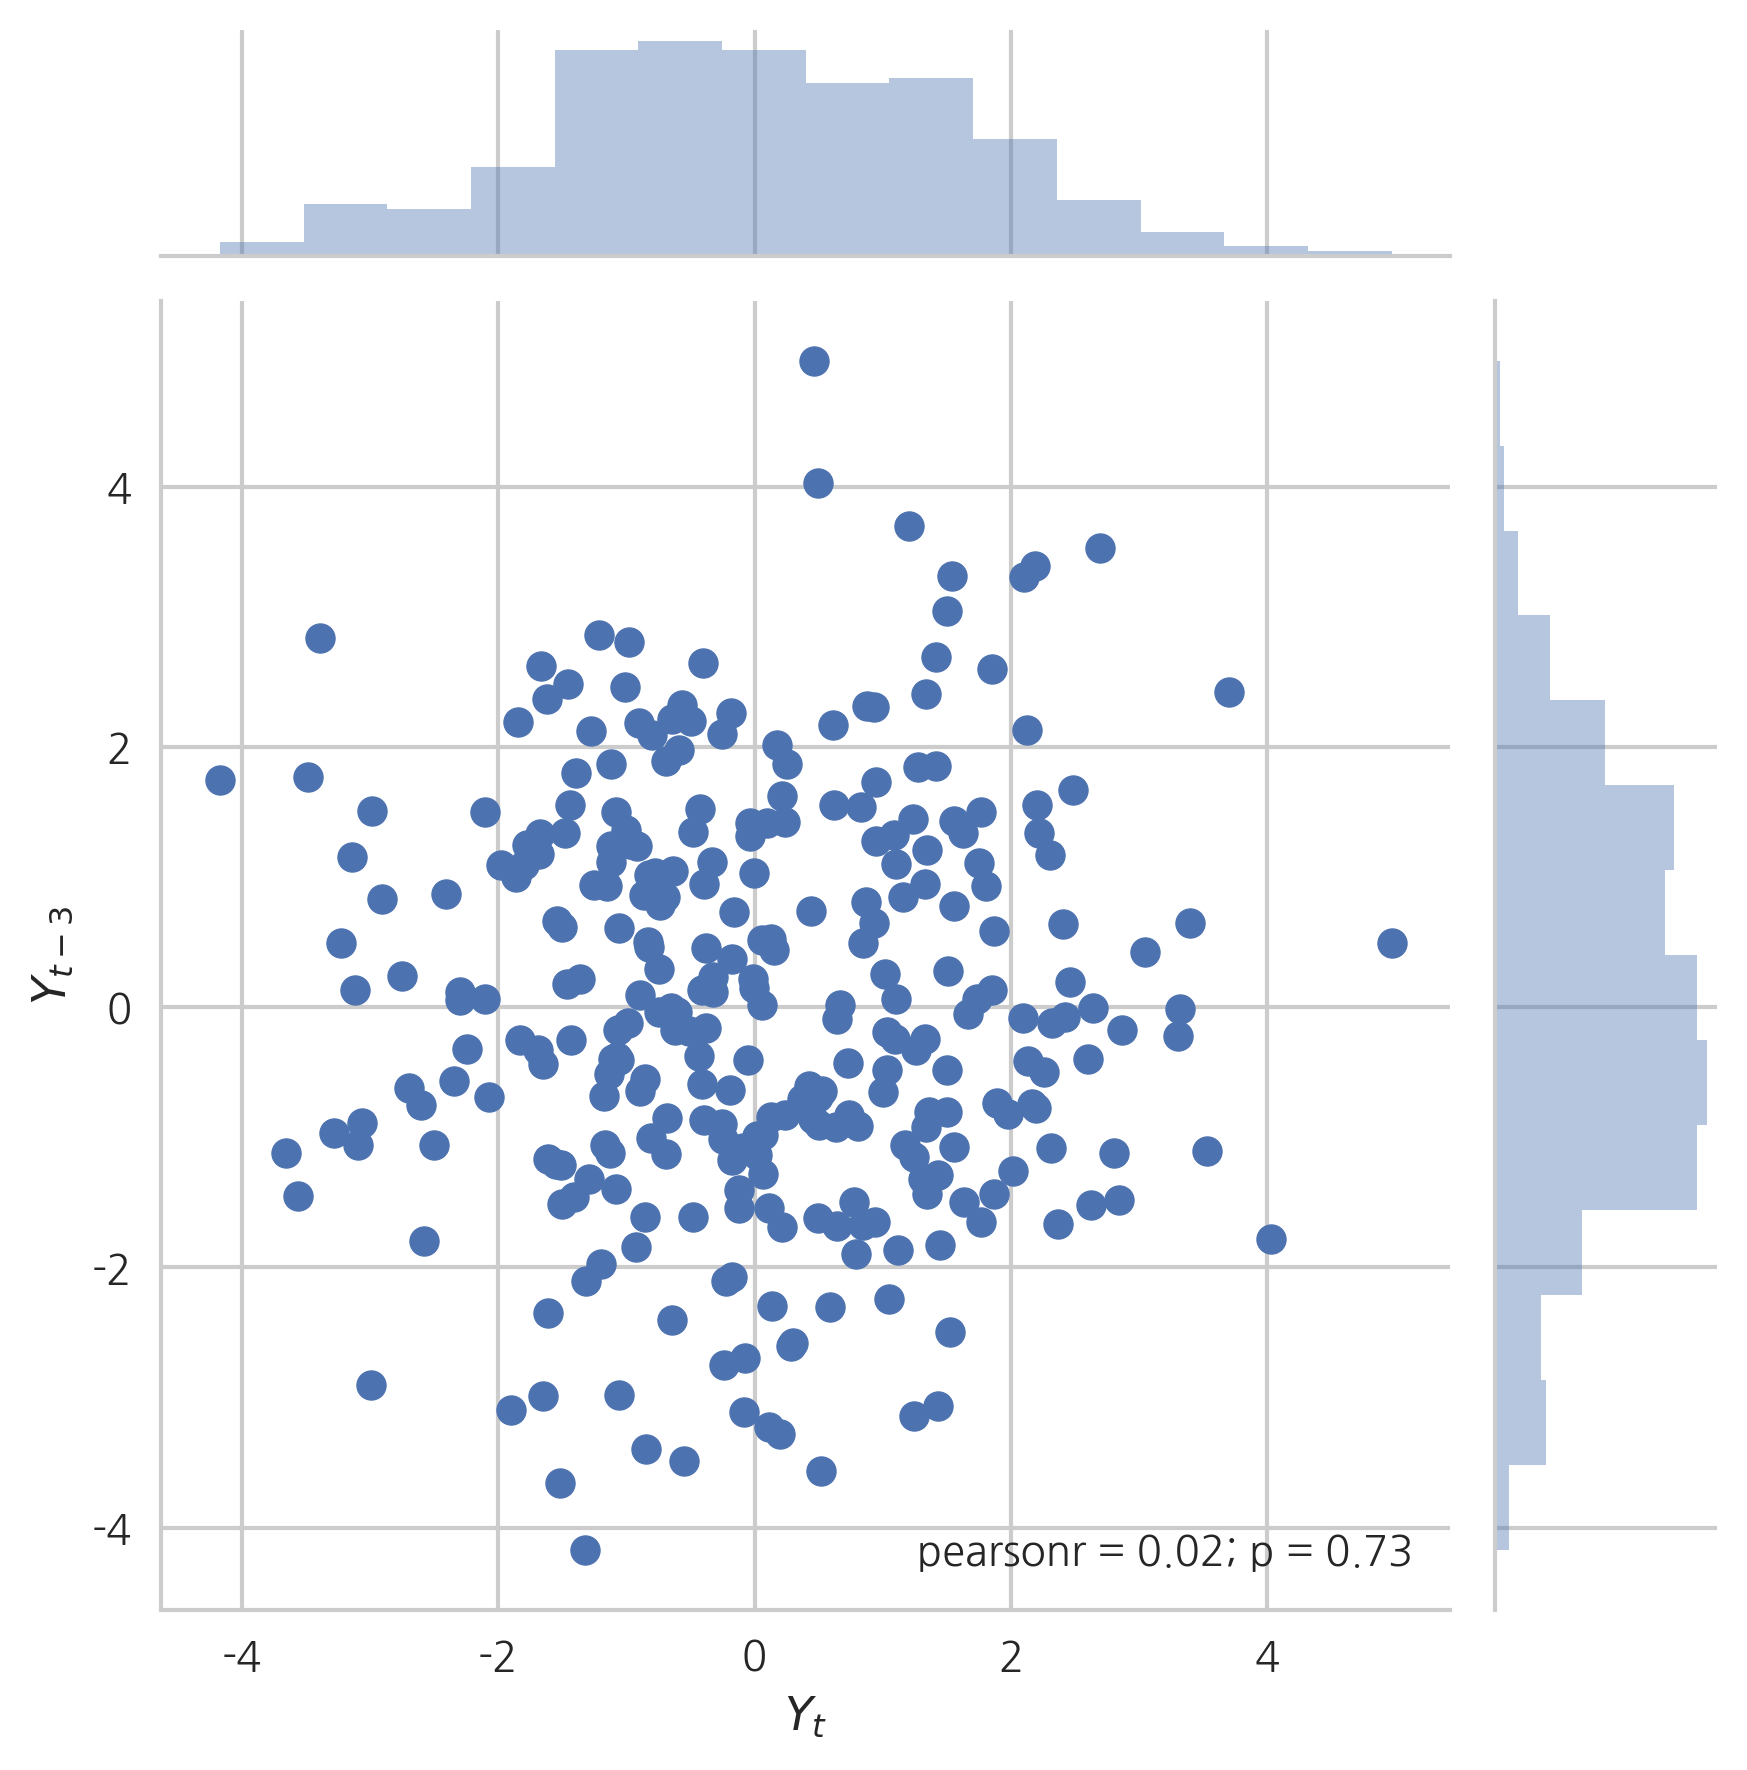

In [5]:
df = pd.DataFrame(np.c_[y1[:-3], y1[3:]])
df.columns = ["$Y_t$", "$Y_{t-3}$"]
sns.jointplot("$Y_t$", "$Y_{t-3}$", df)
plt.show()

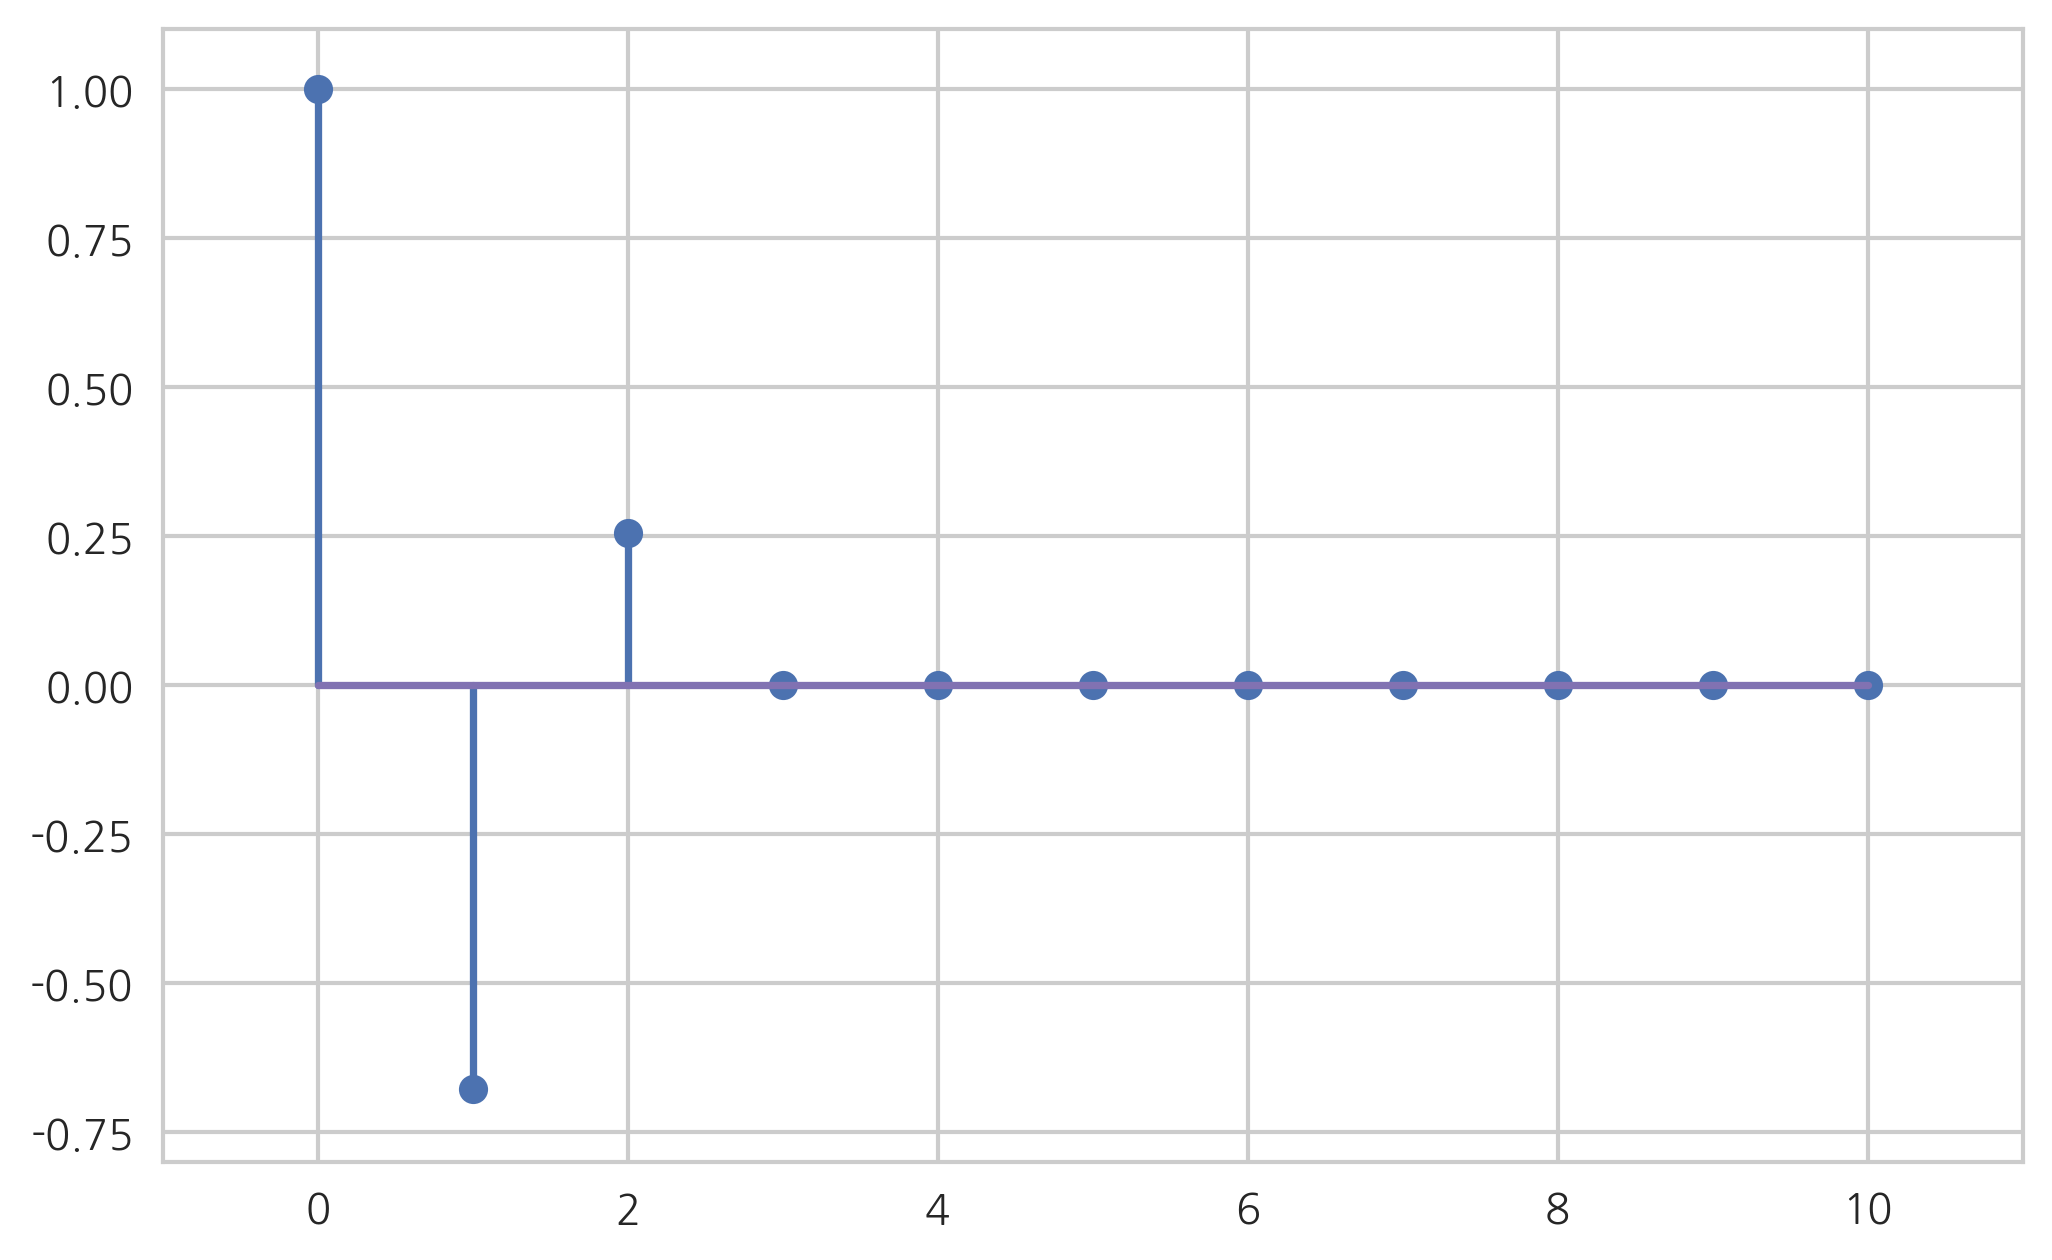

In [6]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.8, 1.1)
plt.show()

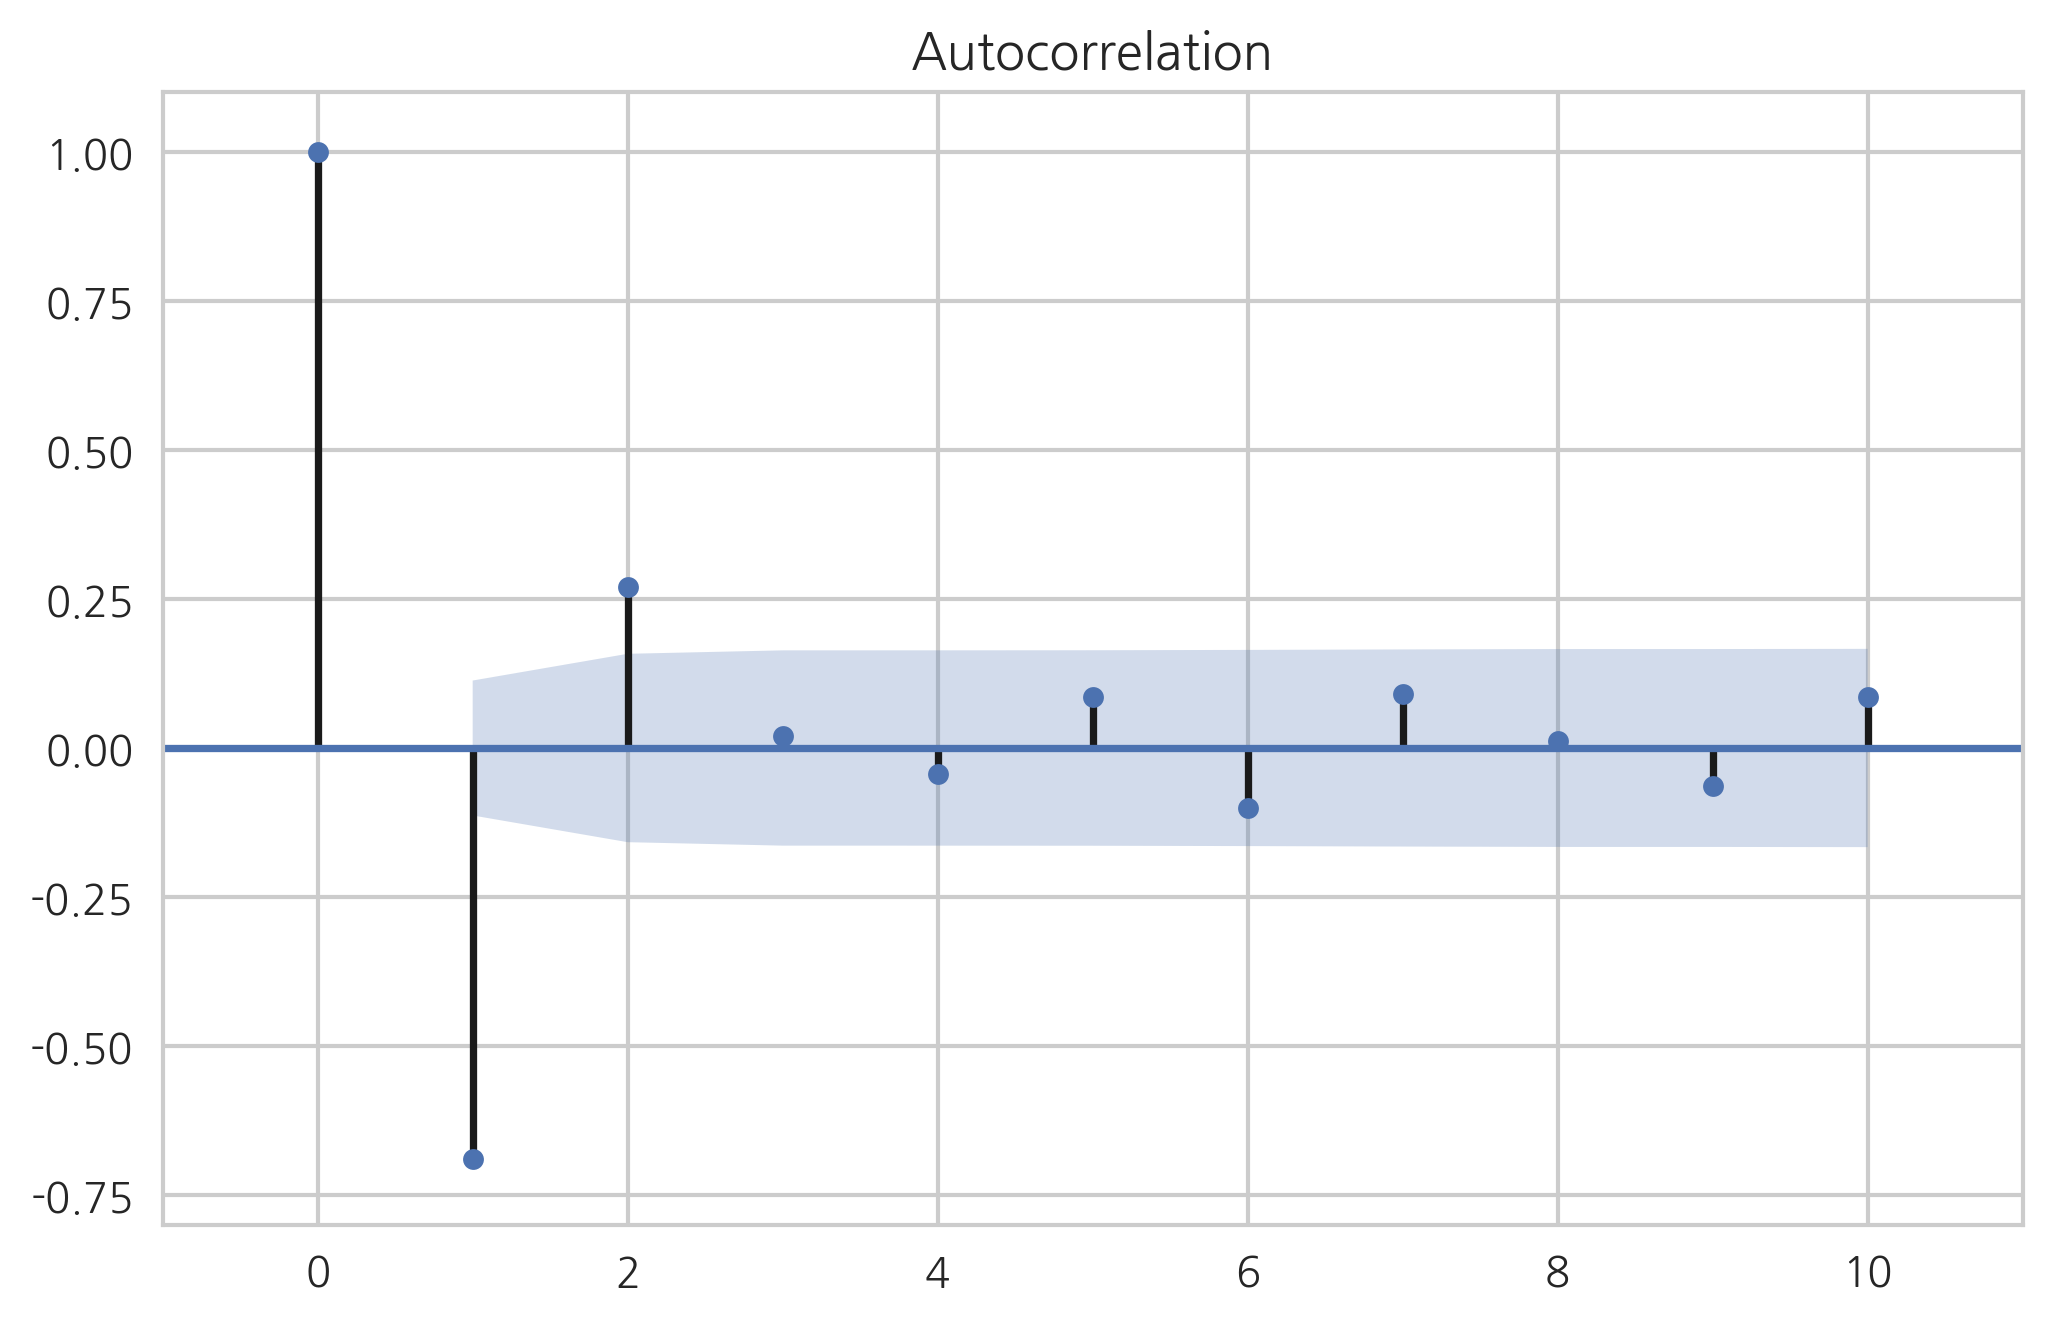

In [7]:
sm.graphics.tsa.plot_acf(y1, lags=10)
plt.xlim(-1, 11)
plt.ylim(-0.8, 1.1)
plt.show()

## 일반적인 $q$차 MA(q) 모형

일반적인 $q$차의 MA(q)모형은 2차를 확장한 다음과 같은 형태이다.


$$ Y_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots + \theta_q e_{t-q} $$

MA(q)의 기댓값은 0이며 자기공분산과 자기상관계수는 다음 성질을 만족한다.

$$ \gamma_0 = 1 + \theta_1^2 + \cdots  + \theta_q^2 $$

$$\rho_l = 
\begin{cases} 
\dfrac{\theta_l + \theta_1\theta_{k-1}  + \theta_2\theta_{k-2} + \cdots + \theta_q\theta_{k-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } k = 1, 2, \cdots, q \\ 
0 & \text{ for } k > q \\ 
\end{cases}
$$

